In [1]:
### Version checks
import numpy as np
import glob

from pyfaidx import Fasta
fasta_seq=Fasta('/illumina/scratch/deep_learning/lsundaram/singlecelldatasets/TCGA/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta')

import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats
from pybedtools import BedTool

In [2]:
import re
df = pd.DataFrame()
df_auroc = pd.DataFrame()
outdir = "/illumina/scratch/deep_learning/akumar22/TCGA/models_250_1364_minibatch_prejitter/gbm_subclone/"
cancer_to_auroc = {}
for cancer_name in ["GBM39_cloneA","GBM39_cloneB","GBM45_cloneA","GBM45_cloneB"]:
    print(cancer_name)
    avg_auroc= []
    avg_auprc = []
    for fold in range(5):
        
        logfile = f"{outdir}/{cancer_name}/fold_{fold}/{cancer_name}_prejitter_fold{fold}.txt"
        with open(logfile,"r") as f:
            filter1 = re.compile("AUROC")
            filter2 = re.compile("AUPRC")
            auroc = 0.0 
            for line in f.readlines(): ### get the last occurrence                                   
                if filter1.match(line): 
                    auroc = float(re.findall("\d+\.\d+", line)[0])
                    print(fold,auroc)
                if filter2.match(line): 
                    auprc = float(re.findall("\d+\.\d+", line)[0])
            avg_auprc.append(auprc)
            avg_auroc.append(auroc)   
            
            df_auroc.loc[fold,cancer_name] = auroc

    assert len(avg_auroc) == 5
    print(np.mean(avg_auroc))
    print(avg_auroc)
    cancer_to_auroc[cancer_name] = np.mean(avg_auroc)
    df.loc[cancer_name,"AuROC"] = np.mean(avg_auroc)
    df.loc[cancer_name,"AuPRC"] = np.mean(np.mean(avg_auprc))

df
    

GBM39_cloneA
0 0.8884417594840766
1 0.8738123585235223
2 0.8491710005456086
3 0.9051566092514188
4 0.7580595434631539
0.8549282542535561
[0.8884417594840766, 0.8738123585235223, 0.8491710005456086, 0.9051566092514188, 0.7580595434631539]
GBM39_cloneB
0 0.915497985421588
1 0.9130430781471709
2 0.9212047365438145
3 0.9156200799502853
4 0.9266649158219791
0.9184061591769674
[0.915497985421588, 0.9130430781471709, 0.9212047365438145, 0.9156200799502853, 0.9266649158219791]
GBM45_cloneA
0 0.8249839781891513
1 0.8911955685681052
2 0.863970323118015
3 0.9052152413783197
4 0.8022700057214801
0.8575270233950143
[0.8249839781891513, 0.8911955685681052, 0.863970323118015, 0.9052152413783197, 0.8022700057214801]
GBM45_cloneB
0 0.8879019424504706
1 0.8859514830392804
2 0.7435829019976625
2 0.8791931236116974
3 0.811064013086171
4 0.8572341221327895
0.8642689368640818
[0.8879019424504706, 0.8859514830392804, 0.8791931236116974, 0.811064013086171, 0.8572341221327895]


,AuROC,AuPRC
GBM39_cloneA,0.854928,0.849411
GBM39_cloneB,0.918406,0.916317
GBM45_cloneA,0.857527,0.837014
GBM45_cloneB,0.864269,0.852807


In [3]:
df_auroc.to_excel("auroc_gbmsubclone.xlsx",index=None)

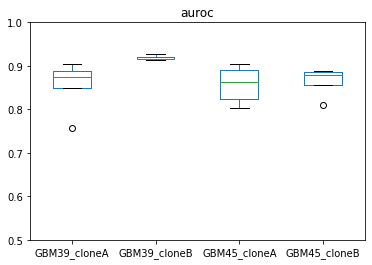

In [3]:
import matplotlib
plt.rcParams["figure.figsize"]=20,10
matplotlib.rcParams['pdf.fonttype']=42
fig,ax=plt.subplots()
df_auroc.boxplot(ax=ax)
ax.set_title("auroc")
ax.set_xticks(ax.get_xticks(),rotation=90)
ax.grid(False)
ax.set_ylim(0.5,1.0)
fig.savefig(f'auroc_gbm.pdf',dpi=1200)
plt.show()